##  Trigonometric Fourier series examples

**Example:** Find the compact trigonometric Fourier series for the exponential $e^{\frac{-t}{2}}$ over the interval $0 \leq t \leq \pi$

**Solution**

The fundamental frequency is $\omega_0=\frac{2\pi}{T_0}=\frac{2\pi}{\pi}=2$ rad/sec.
$$g(t)\,=\,a_0\,+\,\sum_{n=1}^{\infty}\,a_n\,cos\,2nt\,+\,b_n\,sin\,2nt\;\;\;0\leq t\leq \pi$$
$$a_0\:=\:\frac{1}{\pi}\:\int_{0}^{\pi}\:e^{\frac{-t}{2}}\:dt\:=\:0.504$$
$$a_n\:=\:\frac{1}{\pi}\:\int_{0}^{\pi}\:e^{\frac{-t}{2}}\:\cos\,2nt\:dt\:=\:0.504\,\frac{2}{1+16n^2}$$
$$b_n\:=\:\frac{1}{\pi}\:\int_{0}^{\pi}\:e^{\frac{-t}{2}}\:\sin\,2nt\:dt\:=\:0.504\,\frac{8n}{1+16n^2}$$
$$g(t)\:=\:0.504\:[1\:+\:\sum_{n=1}^{\infty}\:\frac{2}{1+16n^2}\:(\cos 2nt+\:4n\,\sin 2nt)] \:\:\:, 0 \leq t \leq \pi$$

For the compact Fourier series:
$$C_0\,=\,a_0=\,0.504$$
$$C_n\,=\,\sqrt{a_{n}^{2}+b_{n}^{2}}\,=\,0.504\,\sqrt{\frac{4}{(1+16n^2)^2}\frac{64n^2}{(1+16n^2)^2}}\,=\,0.504\,(\frac{2}{\sqrt{1+16n^2}})$$
$$\theta _n=\tan ^{-1}(\frac{-b_n}{a_n})=tan ^{-1}(-4n)=-tan ^{-1}(4n) $$

$$g(t)= 0.504+0.244\,\cos(2t-75.96^o)+0.125\,\cos(4t-82.42^o)\,+\,...\;\;\;,0\,\leq t\,\leq \pi$$


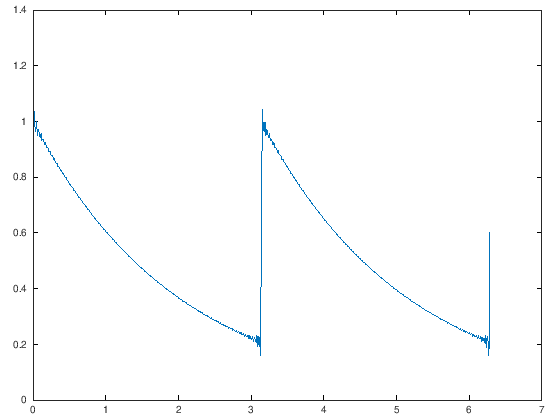

In [1]:
% This program synthesizes Fourier series to yield the original function
T0  = pi;
w0  = 2;
t   = 0 : T0/256 : 2*T0;  % create a time vector of two cycles length
i   = 100;  % number of iterations (harmonics)
c0  = 0.504;
cn_sum  = 0;

for n = 1:i
    cn     = 0.504*(2 / sqrt(1 + 16*n^2)) * cos(2*n.*t - atan(4*n) );
    cn_sum = cn_sum + cn; 
end

g = c0 + cn_sum;

% figure
plot(t,g)

Compute and plot the trigonometric and exponential Fourier sereis of the periodic signal $g(t) = e^{-t/2}, 0< t < \pi$ . 

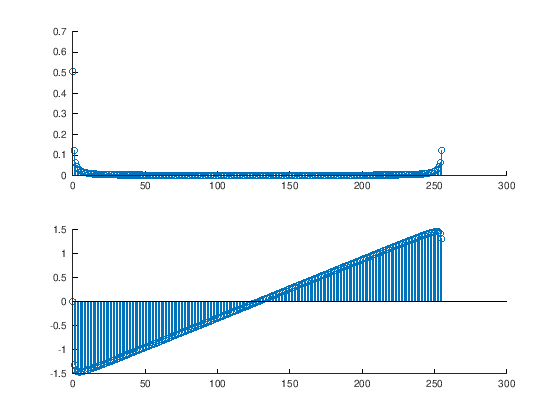

In [2]:
% (c21.m)
% M is the number of coefficients to be computed
T0 = pi; N0 = 256; Ts = T0/N0; M = 10;
t = 0:Ts:Ts*(N0-1); 
t = t';
g = exp(-t/2);

% fft(g) is the FFT
Dn = fft(g)/N0;
[Dnangle, Dnmag] = cart2pol(real(Dn), imag(Dn));
k = 0:length(Dn)-1; 
k = k';
subplot(211), stem(k,Dnmag)
subplot(212), stem(k,Dnangle)


Amplitudes Angles
ans =

    0.50583    0.00000
    0.24537  -75.26135
    0.12549  -81.47017
    0.08403  -83.12914
    0.06313  -83.61404
    0.05055  -83.62557
    0.04215  -83.39962
    0.03615  -83.03775
    0.03165  -82.59085
    0.02815  -82.08721



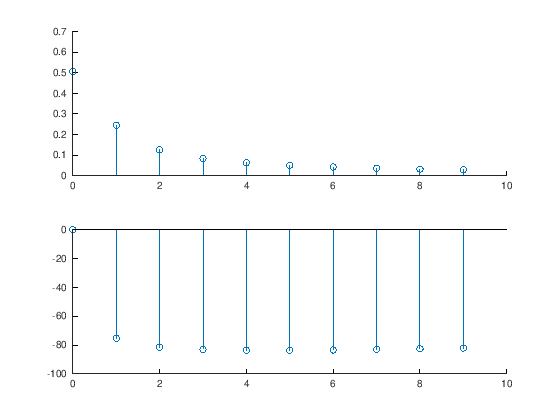

In [5]:
C0 = Dnmag(1);
Cn = 2 * Dnmag(2:M);
Amplitudes = [C0; Cn];
Angles = Dnangle(1:M) * (180/pi);
disp('Amplitudes Angles')
[Amplitudes Angles]

% To plot the Fourier coefficients
k = 0 : length(Amplitudes)-1;
k = k';
subplot(211), stem(k,Amplitudes)
subplot(212), stem(k,Angles)

## Symbolic Matlab

Using symbolic toolbox, you can determine Fourier series

In [22]:
warning ("off")
pkg load symbolic
syms x n L k

evalin(symengine,'assume(n,Type::Integer)');

a  = @(f,x,n,L) int(f*cos(n*2*pi*x/L)/L*2,x,0,L);

b  = @(f,x,n,L) int(f*sin(n*2*pi*x/L)/L*2,x,0,L);

fs = @(f,x,k,L) a(f,x,0,L)/2 + symsum(a(f,x,n,L)*cos(n*2*pi*x/L) + b(f,x,n,L)*sin(n*2*pi*x/L),n,1,k);

%f = exp(-x/2)

%f = abs(x - 0.5)

%f = abs(sin(x))

%f =  sign(x - 0.5)


pretty(fs(f,x,7,2*pi))


error: 'symengine' undefined near line 1 column 8
f = (sym) │sin(x)│
    4⋅cos(2⋅x)   4⋅cos(4⋅x)   4⋅cos(6⋅x)   2
  - ────────── - ────────── - ────────── + ─
       3⋅π          15⋅π         35⋅π      π


In [8]:
f = x>0.5

    double_to_sym_heuristic at line 50 column 7
    sym at line 373 column 13
    gt at line 47 column 5
f = (sym) x > 1/2


In [9]:
f = (sym) x > 1/2

parse error:

  syntax error

>>> f = (sym) x > 1/2
              ^



In [16]:
syms x
f =  sign(x-0.5)

    double_to_sym_heuristic at line 50 column 7
    sym at line 373 column 13
    minus at line 57 column 5
f = (sym) sign(x - 1/2)


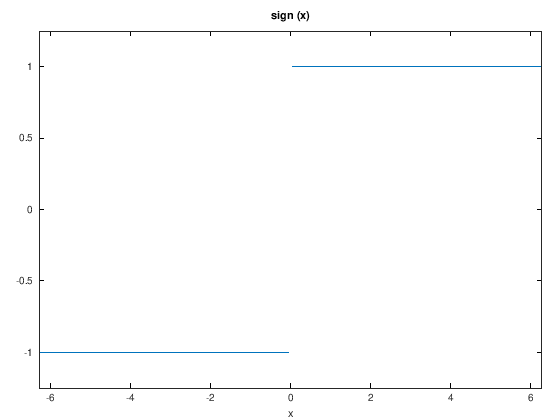

In [14]:
ezplot(f)

In [18]:
pretty(fs(f,x,5,1))

    4⋅sin(2⋅π⋅x)   4⋅sin(6⋅π⋅x)   4⋅sin(10⋅π⋅x)
  - ──────────── - ──────────── - ─────────────
         π             3⋅π             5⋅π     


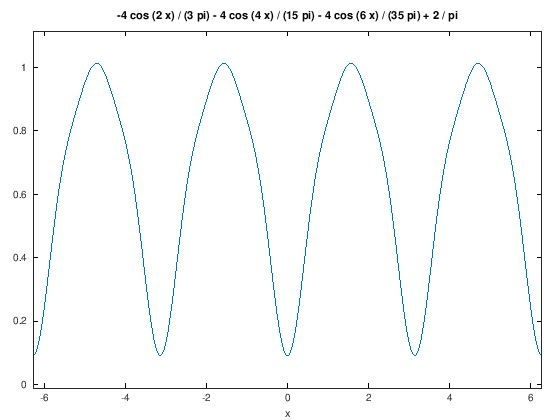

In [25]:
ezplot(fs(f,x,7,2*pi))